In [32]:
%matplotlib widget

from IPython.display import display, Latex
import pandas as pd

import sympy
from sympy.abc import U, omega, t
from sympy.simplify.fu import TR8

from visual import disp, plot
from calculate import op

In [33]:
a_0 = sympy.Symbol('a_0')
a_1 = sympy.Symbol('a_1')
_u = sympy.Symbol('\widehat{u}')
G = a_0 * (a_1 - U)
disp(G)
u = _u * sympy.sin(omega * t)
disp(u)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [34]:
G = G.subs([(a_0, 5E-4), (a_1, 4)])
disp(G)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

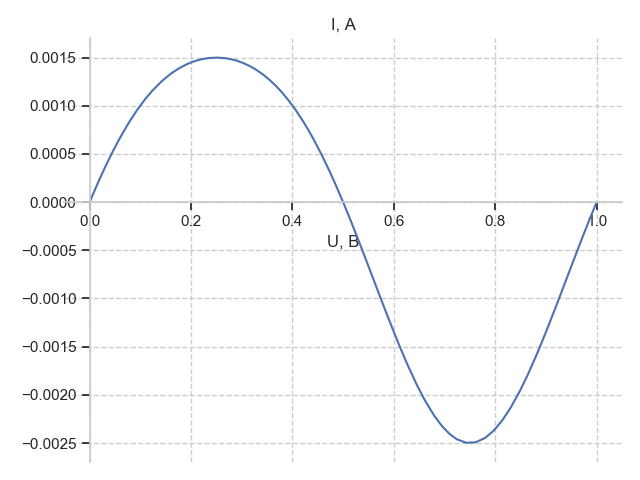

In [35]:
#1
f = 1
i = (u * G).subs([(U, u), (omega, 2 * sympy.pi * f)])
disp(i)
I = i.subs(_u, 1)
disp(I)
plot(I, (t, 0, 1))

In [36]:
#2
T = 1 / f
I_0 = sympy.integrate(I, (t, 0, T)) / T
disp(I_0)

<IPython.core.display.Latex object>

In [37]:
I = TR8(I.expand())
display(Latex('$I_1, I_2, I_0$'))
disp(I)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [39]:
#3
_ulim = (_u, 0, 2)
#TODO